# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, LSTM, GRU, Input

from tqdm import tqdm
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import chi2, RFE, SelectFromModel, SelectKBest


from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.svm import SVR, LinearSVC, NuSVC, LinearSVR, NuSVR
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestCentroid, RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier, \
    AdaBoostClassifier, RandomForestClassifier, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegressionCV, RidgeClassifier, ARDRegression, BayesianRidge, \
    ElasticNetCV, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC, OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV, \
    PassiveAggressiveRegressor, PoissonRegressor, RANSACRegressor, Ridge, RidgeCV, SGDRegressor, TheilSenRegressor, TweedieRegressor, LogisticRegression


# Load Data

In [114]:
data = pd.read_csv('..\Dataset\Covid Data.csv')
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


# Initial Analysis

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [116]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
INTUBED,1048575.0,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,1048575.0,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0
DIABETES,1048575.0,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0
COPD,1048575.0,2.260569,5.132258,1.0,2.0,2.0,2.0,98.0


In [117]:
for i, column in enumerate (data.columns):
    print(f"{column} : {len(data[column].unique())}")

USMER : 2
MEDICAL_UNIT : 13
SEX : 2
PATIENT_TYPE : 2
DATE_DIED : 401
INTUBED : 4
PNEUMONIA : 3
AGE : 121
PREGNANT : 4
DIABETES : 3
COPD : 3
ASTHMA : 3
INMSUPR : 3
HIPERTENSION : 3
OTHER_DISEASE : 3
CARDIOVASCULAR : 3
OBESITY : 3
RENAL_CHRONIC : 3
TOBACCO : 3
CLASIFFICATION_FINAL : 7
ICU : 4


In [118]:
data['DATE_DIED'].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

 # Process Columns name and Dtypes

In [119]:
data["DEATH"] = [2 if each=="9999-99-99" else 1 for each in data["DATE_DIED"]]

In [147]:
def get_columns_names(data): 
    numerical_columns   = [column for column in data.columns if data[column].dtype != 'object']
    categorical_columns = [column for column in data.columns if data[column].dtype == 'object']
    non_biner_columns   = [column for column in data.columns if len(data[column].unique()) > 2]
    non_biner_columns.remove('DATE_DIED')
    non_biner_columns.remove('INTUBED')
    non_biner_columns.remove('ICU')
    return numerical_columns, categorical_columns, non_biner_columns

numerical_columns, categorical_columns, non_biner_columns = get_columns_names(data)
print(numerical_columns)
print(categorical_columns)
print(non_biner_columns)

['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH']
['DATE_DIED']
['MEDICAL_UNIT', 'AGE', 'PREGNANT', 'CLASIFFICATION_FINAL']


In [121]:
def set_dtypes(data):
    for column in numerical_columns:
        data[column] = data[column].astype('int8')
    return data

data = set_dtypes(data)

In [122]:
def remove_unrelevant_number(data):
    data = data[(data["PNEUMONIA"] == 1) | (data["PNEUMONIA"] == 2)]
    data = data[(data["DIABETES"] == 1) | (data["DIABETES"] == 2)]
    data = data[(data["COPD"] == 1) | (data["COPD"] == 2)]
    data = data[(data["ASTHMA"] == 1) | (data["ASTHMA"] == 2)]
    data = data[(data["INMSUPR"] == 1) | (data["INMSUPR"] == 2)]
    data = data[(data["HIPERTENSION"] == 1) | (data["HIPERTENSION"] == 2)]
    data = data[(data["OTHER_DISEASE"] == 1) | (data["OTHER_DISEASE"] == 2)]
    data = data[(data["CARDIOVASCULAR"] == 1) | (data["CARDIOVASCULAR"] == 2)]
    data = data[(data["OBESITY"] == 1) | (data["OBESITY"] == 2)]
    data = data[(data["RENAL_CHRONIC"] == 1) | (data["RENAL_CHRONIC"] == 2)]
    data = data[(data["TOBACCO"] == 1) | (data["TOBACCO"] == 2)]

    # data = data[(data["INTUBED"] == 1) | (data["INTUBED"] == 2)]
    # data = data[(data["PREGNANT"] == 1) | (data["PREGNANT"] == 2)]
    # data = data[(data["ICU"] == 1) | (data["ICU"] == 2)]

    return data

data = remove_unrelevant_number(data)


# Data Explorations

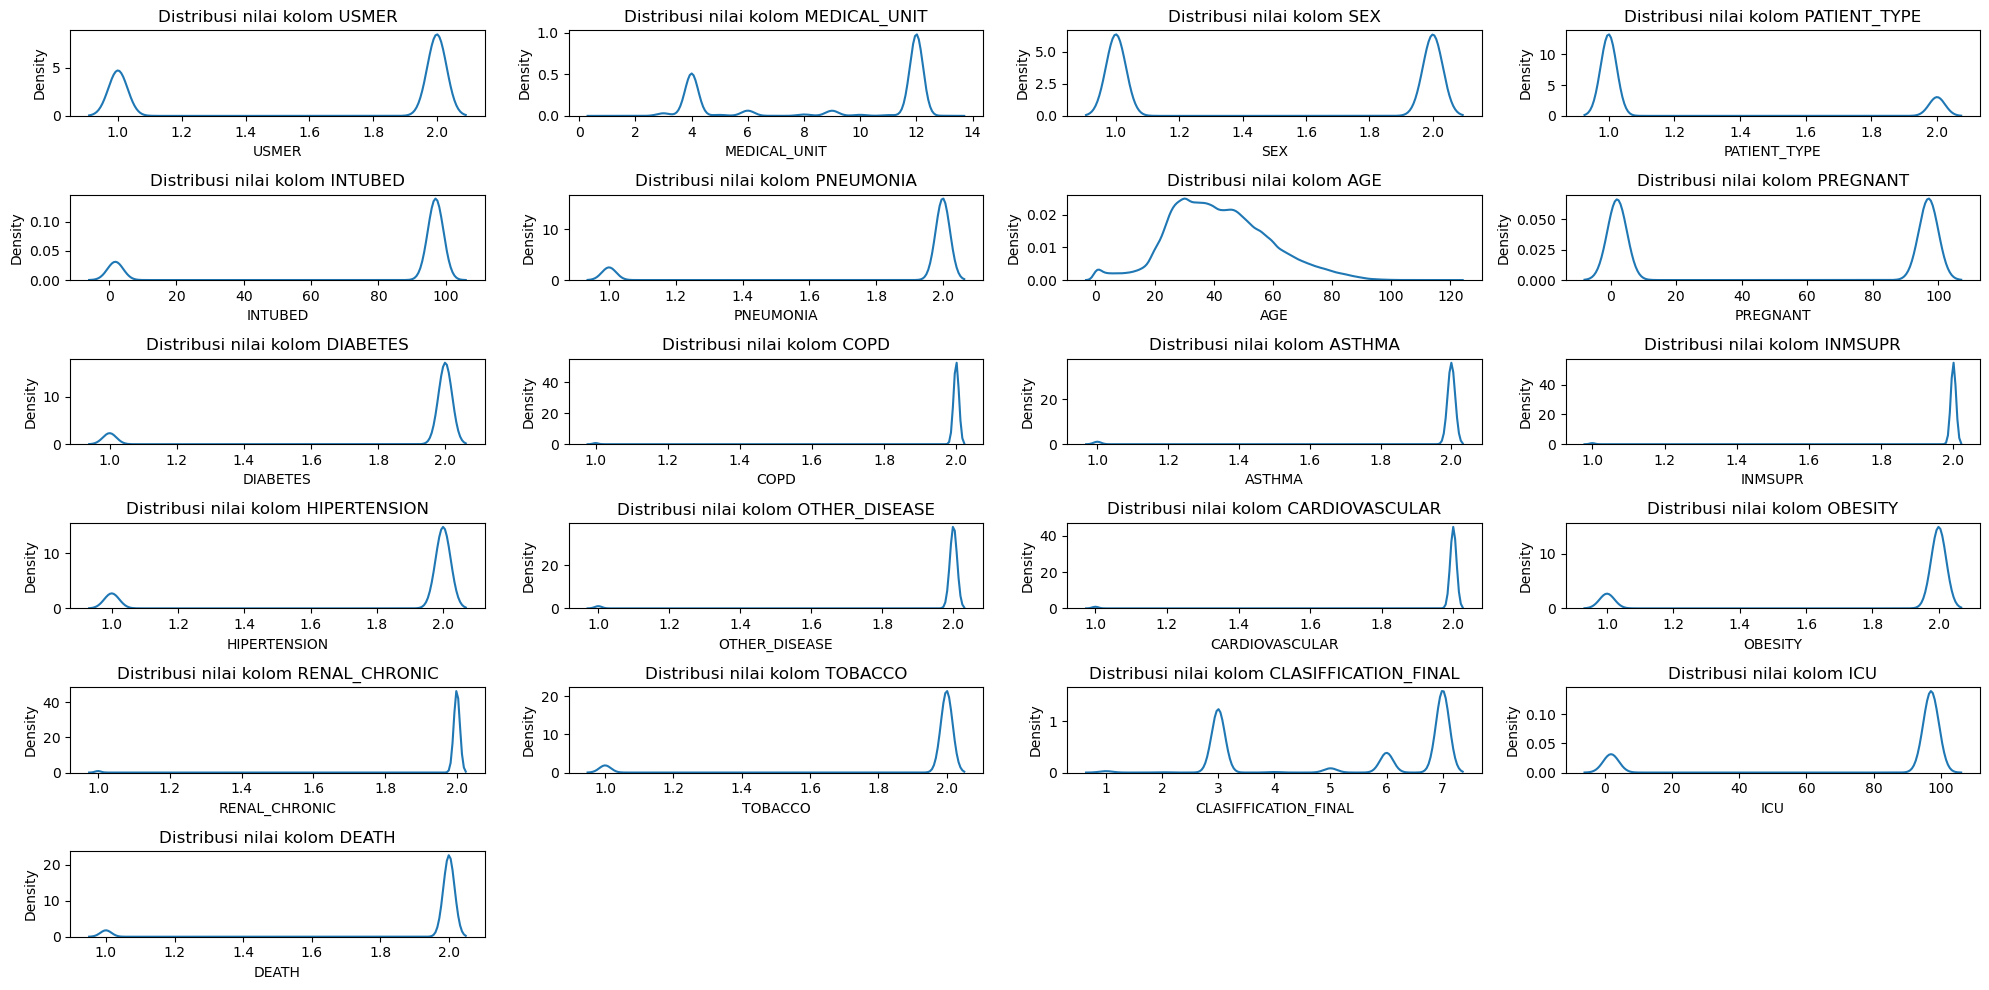

In [123]:
num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data=data, x=column, ax=axes[row, col]).set_title("Distribusi nilai kolom " + column)
    

for i in range(len(numerical_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

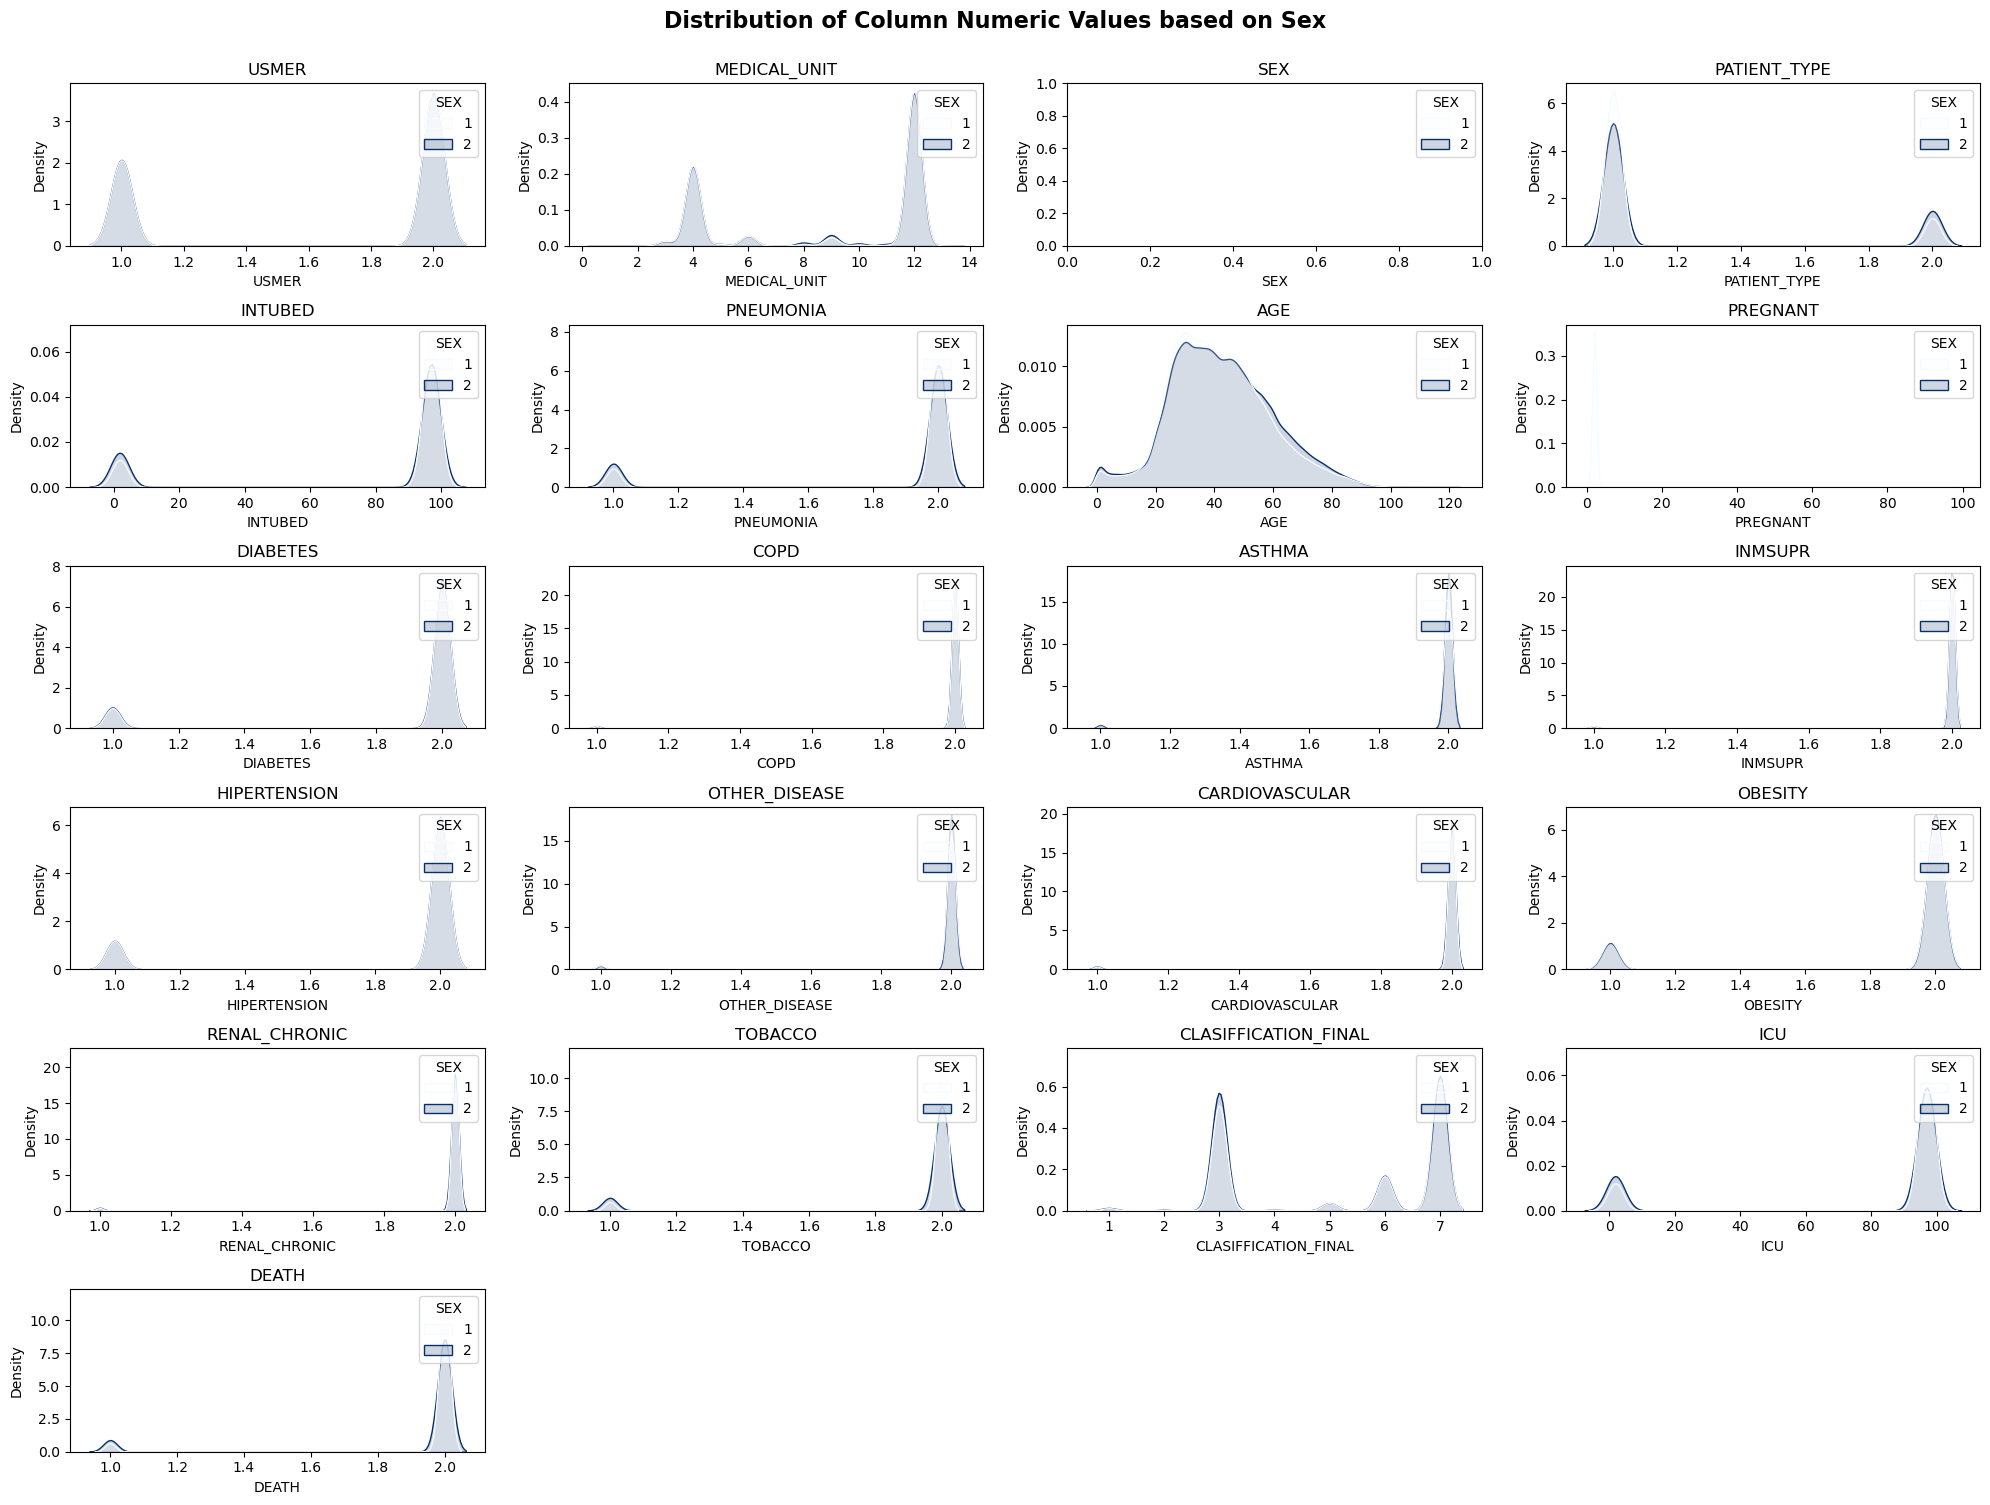

In [124]:
num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data=data, x=column, hue="SEX", 
                fill=True, alpha=.2, palette="Blues", 
                ax=axes[row, col])\
                .set_title(column)

for i in range(len(numerical_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

fig.suptitle('Distribution of Column Numeric Values based on Sex', y=1.0, fontsize=16, fontweight='bold')


plt.tight_layout()
plt.show()

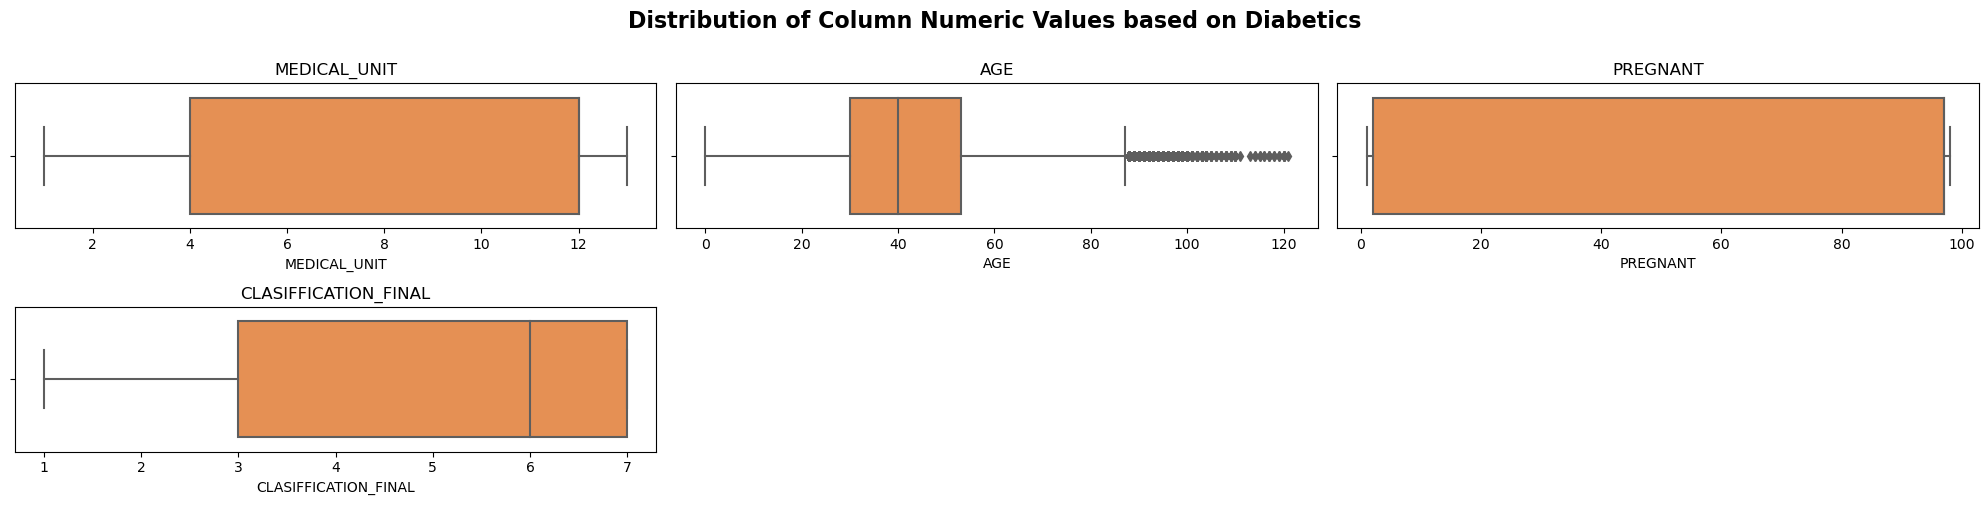

In [148]:
num_cols = 3
num_rows = math.ceil(len(non_biner_columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))
for i, column in enumerate(non_biner_columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=data[column], ax=axes[row, col], palette="Oranges").set_title(column)
    
for i in range(len(non_biner_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

fig.suptitle('Distribution of Column Numeric Values based on Diabetics', y=1.0, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### Correlation between columns

Text(0.5, 1.0, 'Correlation Matrix')

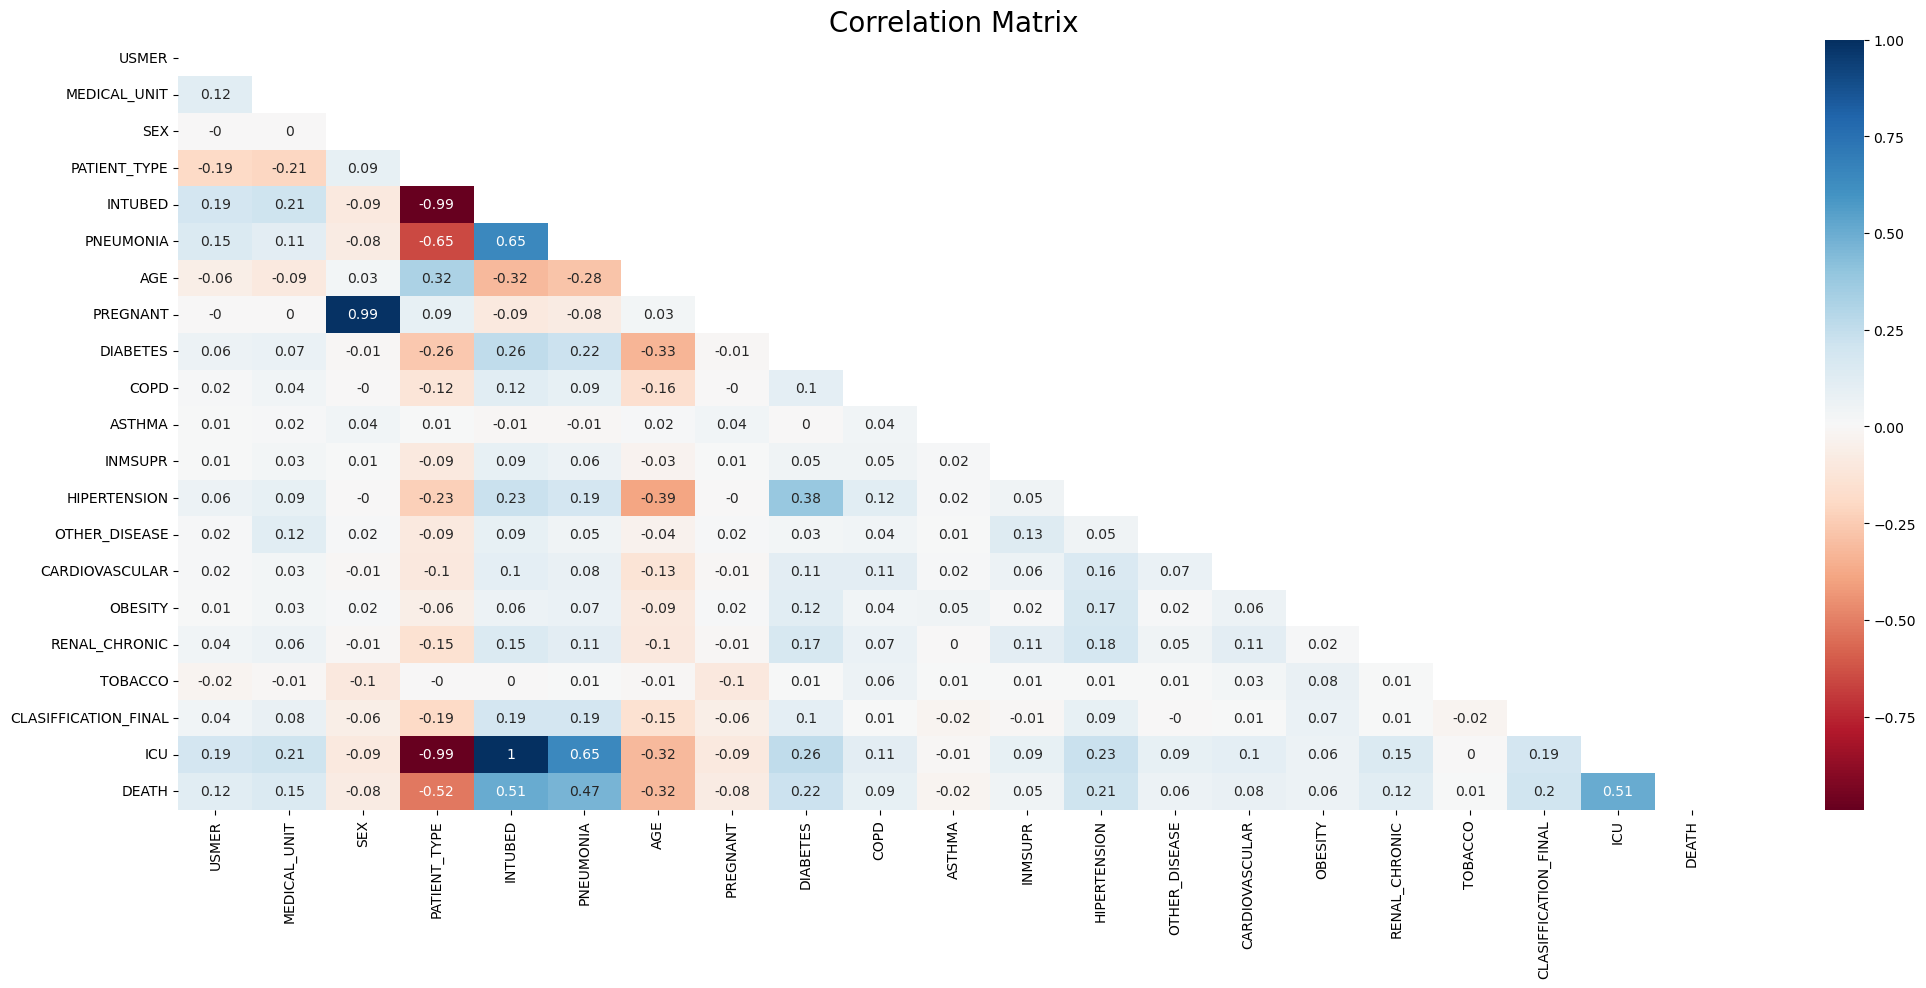

In [150]:
corr_data1 = data.corr().round(2)

mask = np.zeros_like(corr_data1)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
plt.figure(figsize=(25, 10))
sns.heatmap(corr_data1, annot=True, mask=mask, cmap='RdBu')
plt.title("Correlation Matrix", size=20)

# Preprocessing

### Feature Selection Algorithms

In [ ]:
### Pearson Correlation
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    print(str(len(cor_feature)), 'selected features')
    print(cor_feature)
    return cor_feature

### Chi-Squared
def chi_squared_elimination(X, Y,num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, Y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:,chi_support].columns.tolist()
    print(str(len(chi_feature)), 'selected features')
    print(chi_feature)
    return chi_feature

### Recursive Feature Elimination
def recursive_elimination(X, Y,num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
    rfe_selector.fit(X_norm, Y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    print(str(len(rfe_feature)), 'selected features')
    print(rfe_feature)
    return rfe_feature

### Lasso: SelectFromModel
def lasso_elimination(X, Y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
    embeded_lr_selector.fit(X_norm, Y)
    embeded_lr_support = embeded_lr_selector.get_support()
    embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
    print(str(len(embeded_lr_feature)), 'selected features')
    print(embeded_lr_feature)
    return embeded_lr_feature

### LightGBM: SelectFromModel
def LGBMC_elimination(X, Y, num_feats):
    lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
                reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

    embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
    embeded_lgb_selector.fit(X, Y)
    embeded_lgb_support = embeded_lgb_selector.get_support()
    embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
    print(str(len(embeded_lgb_feature)), 'selected features')
    print(embeded_lgb_feature)
    return embeded_lgb_feature

### Tree-based: SelectFromModel
def RFC_elimination (X, Y, num_feats):
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
    embeded_rf_selector.fit(X, Y)

    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
    print(str(len(embeded_rf_feature)), 'selected features')
    print(embeded_rf_feature)
    return embeded_rf_feature

In [ ]:
X = data.drop(columns=['DEATH', 'DATE_DIED'])
Y = data['DEATH']

num_feats = 15

selected_feature = cor_selector(X, Y,num_feats)
# selected_feature = chi_squared_elimination(X, Y,num_feats)
# selected_feature = recursive_elimination(X, Y,num_feats)
# selected_feature = lasso_elimination(X, Y, num_feats)
# selected_feature = LGBMC_elimination(X, Y, num_feats)
# selected_feature = RFC_elimination(X, Y, num_feats)

X = data[selected_feature]
Y = data['DEATH']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print(f'Total # of sample in whole dataset : {len(X)}')
print(f'Total # of sample in train dataset : {len(X_train)}')
print(f'Total # of sample in test dataset  : {len(X_test)}')

### No Feature Selection

In [152]:
X = data.drop(columns=['DEATH', 'DATE_DIED'])
Y = data['DEATH']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1025152
Total # of sample in train dataset: 717606
Total # of sample in test dataset: 307546


# Model

In [163]:
def DNN_Model():
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
    dnn_model.add(Dense(32, activation='relu'))
    dnn_model.add(Dense(1, activation='sigmoid'))
    dnn_model._name = 'DNN_Model'
    return dnn_model

def CNN_Model():
    cnn_model = Sequential()
    cnn_model.add(Conv1D(256, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Conv1D(64, 3, activation='relu'))
    cnn_model.add(MaxPooling1D(pool_size=2))
    # cnn_model.add(Conv1D(32, 3, activation='relu'))
    # cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(1, activation='sigmoid'))
    cnn_model._name = 'CNN_Model'
    return cnn_model

def LSTM_Model():
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))
    lstm_model.add(Dense(units=1))
    lstm_model._name = 'LSTM_Model'
    return lstm_model

def GRU_Model():
    gru_model = Sequential()
    gru_model.add(GRU(units=32, input_shape=(X_train.shape[1], 1), 
                activation='tanh',recurrent_activation='sigmoid',recurrent_dropout=0.0,unroll=False, reset_after=True,))
    gru_model.add(Dense(units=1))
    gru_model._name = 'GRU_Model'
    return gru_model

def Autoencoder_Model():
    # define the input shape and input layer
    input_shape = (X_train.shape[1],)
    input_layer = Input(shape=input_shape)
    encoded_layer = Dense(256, activation='relu')(input_layer)
    encoded_layer = Dense(64, activation='relu')(encoded_layer)
    decoded_layer = Dense(16, activation='relu')(encoded_layer)
    decoded_layer = Dense(input_shape[0], activation='sigmoid')(decoded_layer)

    # define the Autoencoder model
    autoencoder_model = Model(input_layer, decoded_layer)
    autoencoder_model._name = 'Autoencoder_Model'

    # compile the Autoencoder model and fit the Autoencoder model to the data
    # autoencoder_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
    autoencoder_model.compile(optimizer='adam', loss='mse')
    autoencoder_model.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test), verbose=1)
    return autoencoder_model

def NN_Algorithms():
    nn_algorithms = [
        # ('DNN', DNN_Model()),
        # ('CNN', CNN_Model()),
        ('LSTM', LSTM_Model()),
        # ('GRU', GRU_Model()),
        # ('Autoencoder', Autoencoder_Model())
    ]
    return nn_algorithms
    
def compile_train_model(model, X_train, y_train, X_test, y_test):
    # model.summary()
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=1)
    return model 

def evaluate_model(model, X_test, y_test):
    acc = 'null'
    y_pred  = model.predict(X_test)

    if(model._name == 'Autoencoder_Model'):
        r2  = round(r2_score(X_test, y_pred), 4)
        mse = round(mean_squared_error(X_test, y_pred), 4)
    else:
        r2  = round(r2_score(y_test, y_pred), 4)
        mse = round(mean_squared_error(y_test, y_pred), 4)
    return acc, mse, r2

def NN_result(result, name, acc, r2, mse):
    result.append((name, acc, r2, mse))
    return result

# Training Model

In [164]:
%%time
result = []

algorithms = NN_Algorithms()

for index, model in enumerate(algorithms):
    print(model[0])
    if(model[0] == 'Autoencoder'):
        nn_model = model[1]
    else:    
        nn_model = compile_train_model(model[1], X_train, y_train, X_test, y_test)
        
    acc, mse, r2= evaluate_model(nn_model, X_test, y_test)
    result = NN_result(result, model[0], acc, r2, mse)
    print('=' * 100)
    
nn_results_df = pd.DataFrame(result, columns=('Model Name', 'Accuracy', 'R-Square', 'MSE'))
nn_results_df

LSTM
Epoch 1/10
2394/5607 [===========>..................] - ETA: 13s - loss: 0.0634

KeyboardInterrupt: 